# Admission Prediction

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the data into dataframe
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
# Checking for null values
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df['GRE Score'].isnull().sum()

15

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GRE Score'>

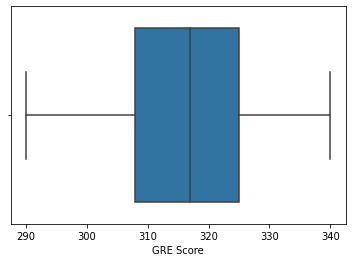

In [7]:
#  Box Plot is generally used for finding the outliers in the data
sns.boxplot(df['GRE Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

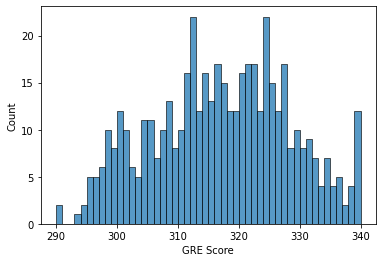

In [8]:
#df['GRE Score'] = np.log(df['GRE Score'])
sns.histplot(df['GRE Score'],bins=50)

In [9]:
df['GRE Score'].mode()[0]

312.0

In [10]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mode()[0]) # Filling with median value

<AxesSubplot:ylabel='Density'>

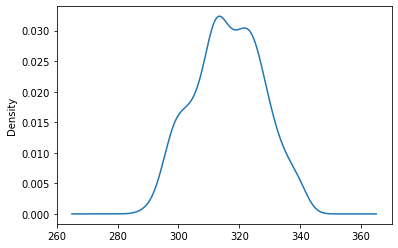

In [11]:
df['GRE Score'].plot(kind='kde') # checking the distribution of the data

In [12]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
print(df['TOEFL Score'].isnull().mean())
print(df['University Rating'].isnull().mean())

0.02
0.03


In [14]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].median())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].median())

In [15]:
print(df['TOEFL Score'].isnull().mean())
print(df['University Rating'].isnull().mean())

0.0
0.0


In [16]:
# Splitting the data into test and train data
X = df.drop(['Serial No.','Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [17]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [18]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [19]:
df.isnull().sum() # now no null values present in our data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

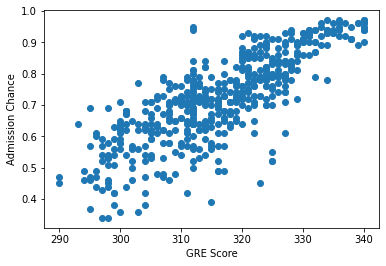

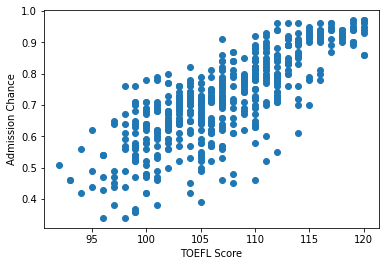

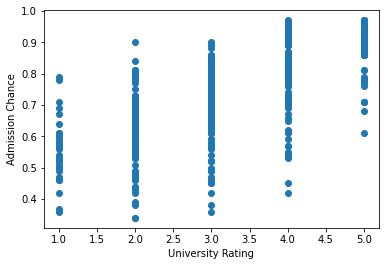

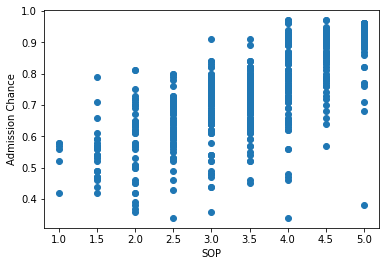

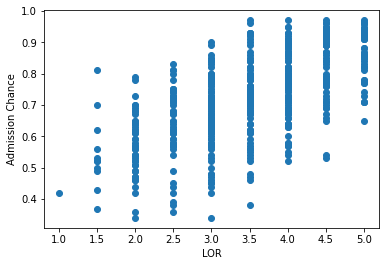

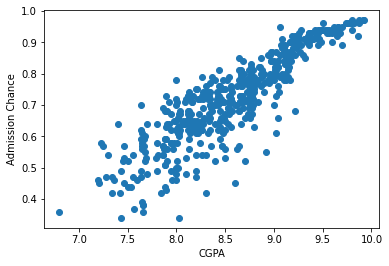

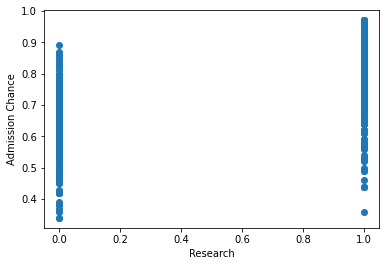

In [20]:
# Visualizing relationship w.r.t my output variable.
for col in X.columns:
    if(col != 'Chance of Admit'):
        plt.scatter(X[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()

In [21]:
# Scaling using the Standard Scaler....it uses z-transform internally
from sklearn.preprocessing import StandardScaler
scaled_feature = StandardScaler()
scaled_data = scaled_feature.fit_transform(X)

scaled_label = StandardScaler()

In [22]:
# Splittng the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=100)

In [23]:
X_train.shape , y_train.shape # checking the shape of X_train and y_train

((335, 7), (335,))

In [24]:
# fitting the data to the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
# Checking the score of the regression model using R2 score
from sklearn.metrics import r2_score
score = r2_score(reg.predict(X_test),y_test)
score

0.8063871554314368

In [26]:
# Saving the model 
import pickle
filename = 'new_finalized_model.pkl'
pickle.dump(reg,open(filename,'wb'))


In [27]:
y_test[0:10].values

array([0.78, 0.54, 0.64, 0.47, 0.7 , 0.88, 0.57, 0.72, 0.84, 0.64])

In [28]:
np.round(reg.predict(X_test)[0:10],2)

array([0.86, 0.47, 0.63, 0.45, 0.65, 0.85, 0.58, 0.67, 0.82, 0.68])

In [29]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict([[310. ,  99. ,   2. ,   1.5,   2. ,   7.3,   0. ]])

array([0.47099095])

In [30]:
y_test.values[1]

0.54

In [31]:
X_test.values[1]

array([310. ,  99. ,   2. ,   1.5,   2. ,   7.3,   0. ])